In [14]:
#Dependencies
from matplotlib import pyplot as plt
import pandas as pd
#import requests
import json
import datetime
#from config import api_key
import scipy.stats as stats
from scipy.stats import linregress

In [15]:
project_data_set_path = "C:Resources/FullDataSet.csv"

project_data_set_df = pd.read_csv(project_data_set_path, encoding='ISO-8859-1')
project_data_set_df

,Date,Month Abbr,State,Number of Flights,Positive,Deaths,Total Tested
0,2020-08-24,Aug,Maryland,281,104669,3694,1794703
1,2020-08-25,Aug,Maryland,254,105046,3707,1807573
2,2020-08-26,Aug,Maryland,263,105486,3717,1819950
3,2020-08-27,Aug,Maryland,289,106063,3722,1841425
4,2020-08-28,Aug,Maryland,252,106664,3736,1868927
5,2020-08-29,Aug,Maryland,265,107294,3746,1894410
6,2020-08-30,Aug,Maryland,266,107791,3752,1919515
7,2020-08-31,Aug,Maryland,287,108249,3755,1938846
8,2020-08-24,Aug,North Carolina,640,156396,2535,2087695
9,2020-08-25,Aug,North Carolina,473,157741,2570,2102359


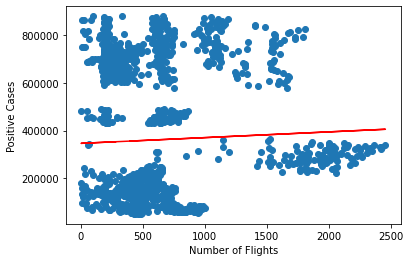

0.10272994766934604

In [18]:
x_values = project_data_set_df['Number of Flights']
y_values = project_data_set_df['Positive']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Number of Flights')
plt.ylabel('Positive Cases')
plt.show()

pvalue

In [22]:
degree_freedom = len(project_data_set_df) - 1
confidence_level = 1 - pvalue


critical_value = stats.chi2.ppf(q = confidence_level, df = degree_freedom)
critical_value

1568.7149049268166

In [ ]:
stats.chisquare(project_data_set_df['Number of Flights'], project_data_set_df['Number of Flights'])